## Bi Directional LSTM

### Imports

In [34]:
import tensorflow as tf
from random import random
from numpy import array
from numpy import cumsum
from matplotlib import pyplot
from pandas import DataFrame
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional

### Data generation

In [37]:
def generate_sequence(n_timesteps):
    # create a sequence of random numbers in [0,1]
    X = array([random() for _ in range(n_timesteps)])
    # calculate cut-off value to change class values
    limit = n_timesteps/4.0
    # determine the class outcome for each item in cumulative sequence
    y = array([0 if x < limit else 1 for x in cumsum(X)])
    # reshape input and output data to be suitable for LSTMs
    X = X.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)
    return X, y

### LSTM For Sequence Classification

In [41]:
# create
n=10
model = Sequential()
model.add(LSTM(20, input_shape=(n, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# train 
for epoch in range(1000):
    X,y = generate_sequence(n)
    model.fit(X, y, epochs=1, batch_size=1, verbose=2)

# predict 
X,y = generate_sequence(n)
yPred = model.predict_classes(X, verbose=0)

for i in range(n):
    print('Expected:', y[0, i], ' Predicted:', yPred[0, i])

Epoch 1/1
 - 2s - loss: 0.7021 - acc: 0.4000
Epoch 1/1
 - 0s - loss: 0.6974 - acc: 0.4000
Epoch 1/1
 - 0s - loss: 0.6953 - acc: 0.4000
Epoch 1/1
 - 0s - loss: 0.6930 - acc: 0.4000
Epoch 1/1
 - 0s - loss: 0.6922 - acc: 0.7000
Epoch 1/1
 - 0s - loss: 0.6844 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6832 - acc: 0.7000
Epoch 1/1
 - 0s - loss: 0.6810 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6720 - acc: 0.7000
Epoch 1/1
 - 0s - loss: 0.6748 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6599 - acc: 0.7000
Epoch 1/1
 - 0s - loss: 0.6688 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6978 - acc: 0.3000
Epoch 1/1
 - 0s - loss: 0.6637 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.7124 - acc: 0.2000
Epoch 1/1
 - 0s - loss: 0.6888 - acc: 0.4000
Epoch 1/1
 - 0s - loss: 0.6720 - acc: 0.5000
Epoch 1/1
 - 0s - loss: 0.6918 - acc: 0.4000
Epoch 1/1
 - 0s - loss: 0.6670 - acc: 0.5000
Epoch 1/1
 - 0s - loss: 0.6843 - acc: 0.4000
Epoch 1/1
 - 0s - loss: 0.6392 - acc: 0.7000
Epoch 1/1
 - 0s - loss: 0.6454 - acc: 0.6000
Epoch 1/1


### Bidirectional LSTM For Sequence Classification

In [42]:
# create
n=10
model = Sequential()
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# train 
for epoch in range(1000):
    X,y = generate_sequence(n)
    model.fit(X, y, epochs=1, batch_size=1, verbose=2)

# predict
X,y = generate_sequence(n)
yPred = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
    print('Expected:', y[0, i], 'Predicted', yPred[0, i])

Epoch 1/1
 - 3s - loss: 0.6773 - acc: 0.7000
Epoch 1/1
 - 0s - loss: 0.6818 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6839 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6733 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.7042 - acc: 0.3000
Epoch 1/1
 - 0s - loss: 0.6977 - acc: 0.4000
Epoch 1/1
 - 0s - loss: 0.6792 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6763 - acc: 0.5000
Epoch 1/1
 - 0s - loss: 0.6842 - acc: 0.5000
Epoch 1/1
 - 0s - loss: 0.6802 - acc: 0.5000
Epoch 1/1
 - 0s - loss: 0.6710 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6658 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6678 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6621 - acc: 0.5000
Epoch 1/1
 - 0s - loss: 0.6610 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6883 - acc: 0.5000
Epoch 1/1
 - 0s - loss: 0.6719 - acc: 0.7000
Epoch 1/1
 - 0s - loss: 0.6563 - acc: 0.7000
Epoch 1/1
 - 0s - loss: 0.6678 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6243 - acc: 0.9000
Epoch 1/1
 - 0s - loss: 0.6634 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6441 - acc: 0.8000
Epoch 1/1


### Compare LSTM to Bidirectional LSTM

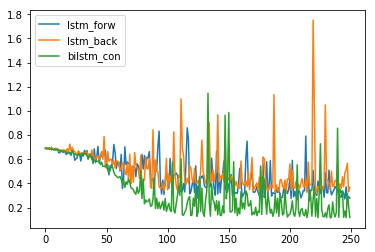

In [49]:
def get_lstm_model(n, backwards):
    model = Sequential()
    model.add(LSTM(20, input_shape=(n, 1), return_sequences=True, go_backwards=backwards))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

def get_bi_lstm_model(n, mode):
    model = Sequential()
    model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n, 1), merge_mode=mode))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

def train_model(model, n):
    loss = list()
    for _ in range(250):
        X,y = get_sequence(n)
        hist = model.fit(X, y, epochs=1, batch_size=1, verbose=0)
        loss.append(hist.history['loss'][0])
    return loss


n = 10
results = DataFrame()

# lstm forwards
model = get_lstm_model(n, False)
results['lstm_forw'] = train_model(model, n)

# lstm backwards
model = get_lstm_model(n, True)
results['lstm_back'] = train_model(model, n)

# bidirectional concat
model = get_bi_lstm_model(n, 'concat')
results['bilstm_con'] = train_model(model, n)

# line plot of results
results.plot()

### Comparing Bidirectional LSTM Merge Modes

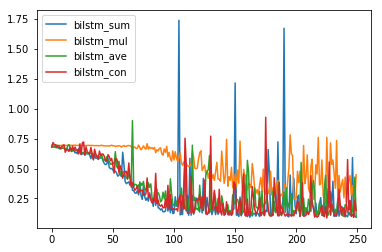

In [48]:
n=10
results = DataFrame()

# sum merge
model = get_bi_lstm_model(n, 'sum')
results['bilstm_sum'] = train_model(model, n)

# mul merge
model = get_bi_lstm_model(n, 'mul')
results['bilstm_mul'] = train_model(model, n)

# avg merge
model = get_bi_lstm_model(n, 'ave')
results['bilstm_ave'] = train_model(model, n)

# concat merge
model = get_bi_lstm_model(n, 'concat')
results['bilstm_con'] = train_model(model, n)

# line plot of results
results.plot()